<a href="https://colab.research.google.com/github/qsdcfd/kaggle/blob/TIL/Multi-class%20classification%20%3A%20Tabular%20data/feature_engineering_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Problem and Data Explanation

- Supervised: 훈련데이터 with label

- Multi-class classification: Labels with 4 discrete values class

<br>

#### Objective

- household level 예측

- 1: extrme poverty

- 2: moderate poverty

- 3: vulnerable households

- 4: non vulnerable households


<br>

#### Metric: Macro F1 score

*standard

F1 = 2* (precision*recall) /(precision + recall)

*Multi-class

Macro F1 = (F1 Class 1 + F1 Class2 + F1 Class 3 + F1 Class 4) /4

"""
from sklearn.metrics import f1_score
f1_score(y_true, y_predicted, average = 'macro`)
"""

---


### Road Data and Look at Summary Information

In [1]:
#imports

##Data manipulation

import pandas as pd
import numpy as np

#Visualization

import matplotlib.pyplot as plt
import seaborn as sns

#Set a few plotting defaults
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 18
plt.rcParams['patch.edgecolor'] = 'k'

In [2]:
pd.options.display.max_columns = 159

#read in data
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [3]:
train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21eb7fcc1,0.0,1.0,0.0,1.0,no,10,no,10.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,43.0,100.0,1849.0,1.0,100.0,0.0,1.000000,0.0,100.0,1849.0,4.0
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0e5d7a658,0.0,1.0,1.0,1.0,8,12,no,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,67.0,144.0,4489.0,1.0,144.0,0.0,1.000000,64.0,144.0,4489.0,4.0
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2c7317ea8,0.0,1.0,1.0,1.0,8,no,11,11.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.500000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,92.0,121.0,8464.0,1.0,0.0,0.0,0.250000,64.0,121.0,8464.0,4.0
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2b58d945f,2.0,2.0,0.0,4.0,yes,11,no,11.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.333333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,17.0,81.0,289.0,16.0,121.0,4.0,1.777778,1.0,121.0,289.0,4.0
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2b58d945f,2.0,2.0,0.0,4.0,yes,11,no,11.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,1.333333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,37.0,121.0,1369.0,16.0,121.0,4.0,1.777778,1.0,121.0,1369.0,4.0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6156 entries, 0 to 6155
Columns: 143 entries, Id to Target
dtypes: float64(65), int64(73), object(5)
memory usage: 6.7+ MB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6179 entries, 0 to 6178
Columns: 142 entries, Id to agesq
dtypes: float64(28), int64(109), object(5)
memory usage: 6.7+ MB


Text(0.5, 1.0, 'Count of Unique Values in Integer Columns')

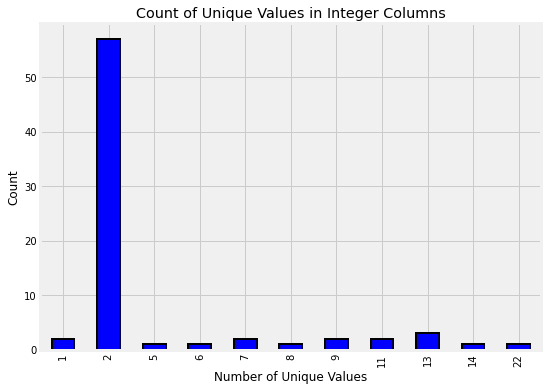

In [6]:
#integer columns

train.select_dtypes(np.int64).nunique().value_counts().sort_index().plot.bar(color='blue',
                                                                             figsize = (8,6),
                                                                             edgecolor='k', linewidth=2)
plt.xlabel('Number of Unique Values');
plt.ylabel('Count');
plt.title('Count of Unique Values in Integer Columns')

ValueError: ignored

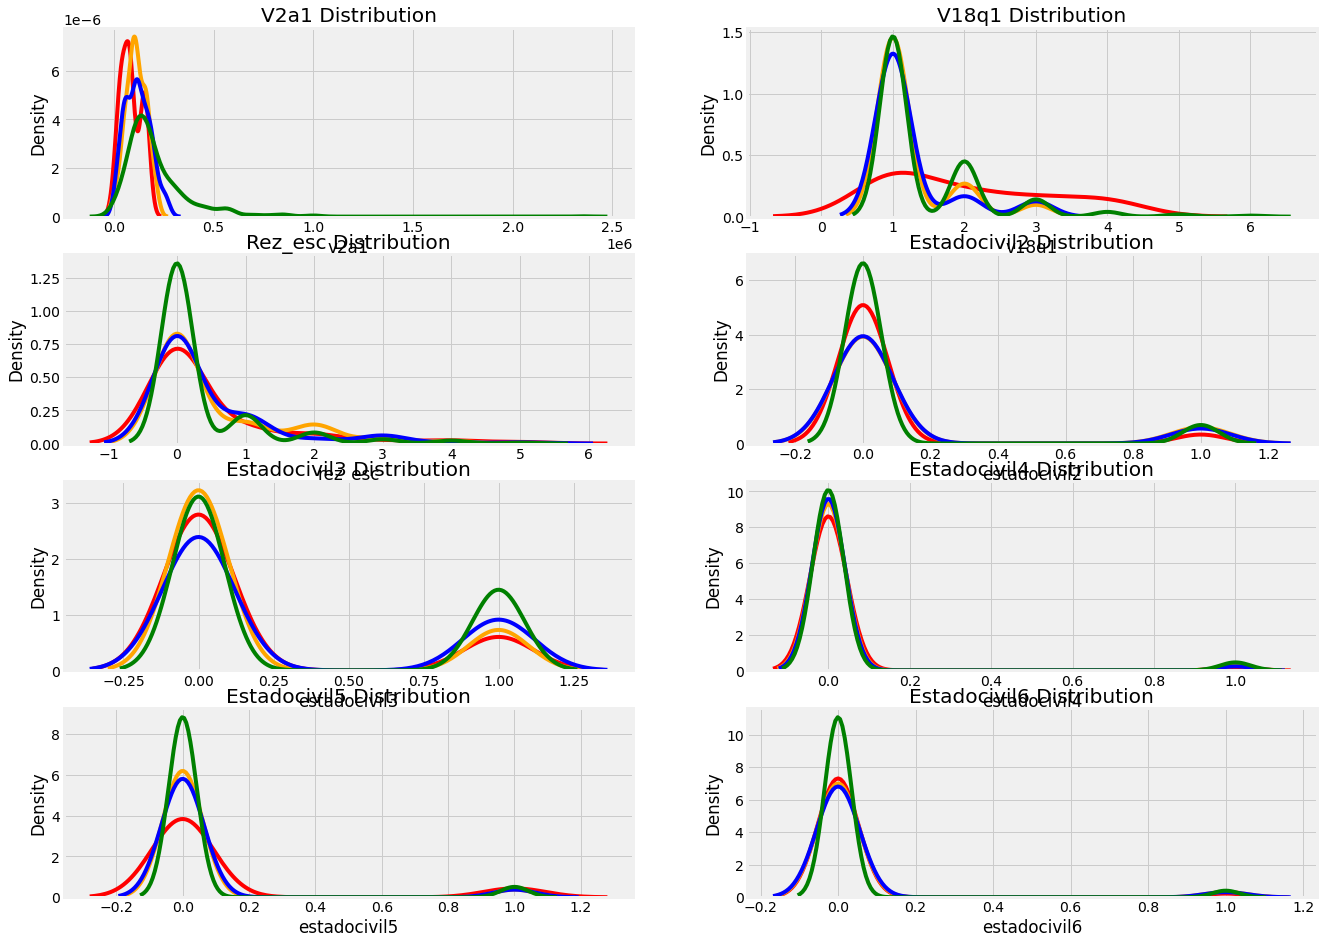

In [7]:
#Float columns는 연속형 변수이기에 OrderDict를 mapping하여 색깔을 숫자로 변경
#키값이 같은 order을 갖는다.: Python dictionary랑 다름

from collections import OrderedDict

plt.figure(figsize = (20,16))
plt.style.use('fivethirtyeight')

#Color mapping
colors = OrderedDict({1:'red', 2:'orange', 3:'blue', 4:'green'})
poverty_mapping = OrderedDict({1:'extreme', 2:'moderate', 3:'vulnerable', 4:'non vulnerable'})

#iterate through the float columns

for i, col in enumerate(train.select_dtypes('float')):
    ax = plt.subplot(4,2, i+1)
    #Iterate through the poverty leves
    for poverty_level, color in colors.items():
        #Plot each poverty level as a separate line
        sns.kdeplot(train.loc[train['Target']== poverty_level,col].dropna(),
                    ax = ax, color = color, label = poverty_mapping[poverty_level])
    plt.title(f'{col.capitalize()} Distribution');
    plt.xlabel(f'{col}');
    plt.ylabel('Density')
plt.subplots_adjust(top=2)

"""
representing the average education of the adults in the household 
appears to be related to the poverty level: 
a higher average adult education leads to higher values of the target 
which are less severe levels of poverty
"""

In [ ]:
#Object Columns
train.select_dtypes('object').head()

In [ ]:
#머신러닝을 위해서 고유값인 id 와 idhogar말고는 숫치화
#yes:1, no:0

mapping = {"yes":1, "no":0}

#Apply same operation to both train and test

for df in [train, test]:
    #Fill in the values with the correct mapping
    df['dependency'] = df['dependency'].replace(mapping).astype(np.float64)
    df['edjefa'] = df['edjefa'].replace(mapping).astype(np.float64)
    df['edjefe'] = df['edjefe'].replace(mapping).astype(np.float64)

train[['dependency', 'edjefa', 'edjefe']].describe()

In [ ]:
plt.figure(figsize = (16, 12))

# Iterate through the float columns
for i, col in enumerate(['dependency', 'edjefa', 'edjefe']):
    ax = plt.subplot(3, 1, i + 1)
    # Iterate through the poverty levels
    for poverty_level, color in colors.items():
        # Plot each poverty level as a separate line
        sns.kdeplot(train.loc[train['Target'] == poverty_level, col].dropna(), 
                    ax = ax, color = color, label = poverty_mapping[poverty_level])
        
    plt.title(f'{col.capitalize()} Distribution'); plt.xlabel(f'{col}'); plt.ylabel('Density')

plt.subplots_adjust(top = 2)

In [ ]:
#Add null Target column to test
test['Target'] = np.nan
data = train.append(test, ignore_index = True)

#### Exploring Label Distribution

In [ ]:
#heads of household
heads = data.loc[data['parentesco1']==1].copy()

#Labels for training

train_labels = data.loc[(data['Target'].notnull())&(data['parentesco1'] ==1), ['Target', 'idhogar']]

#value counts of target
label_counts = train_labels['Target'].value_counts().sort_index()

#Bar plot occurrences of each label
label_counts.plot.bar(figsize=(8,6),
                      color = colors.values(),
                      edgecolor = 'k', linewidth =2 )

#Formatting
plt.xlabel('Poverty Level');
plt.ylabel('Count');
plt.xticks([x-1 for x in poverty_mapping.keys()],
           list(poverty_mapping.values()), rotation = 60)
plt.title('Poverty Level Breakdown');
label_counts


### Addressing wrong labels



In [ ]:
#Identify Errors
## Groupby the household and figure out the number of unique values
all_equal = train.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)

# Households where targets are not all equal
not_equal = all_equal[all_equal != True]
print('There are {} households where the family members do not all have the same target.'.format(len(not_equal)))

In [ ]:
train[train['idhogar'] == not_equal.index[0]][['idhogar', 'parentesco1', 'Target']]

In [ ]:
#families without heads of household

households_leader = train.groupby('idhogar')['parentesco1'].sum()

##Find households without a head
households_no_head = train.loc[train['idhogar'].isin(households_leader[households_leader ==0].index),:]

print('There are {} households without a head.'.format(households_no_head['idhogar'].nunique()))

In [ ]:
# Find households without a head and where labels are different
households_no_head_equal = households_no_head.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)
print('{} Households with no head have different labels.'.format(sum(households_no_head_equal == False)))

In [ ]:
#Correct Errors
##Iterate through each household

for household in not_equal.index:
    #Find the correct label(for the head of household)
    true_target = int(train[(train['idhogar'] == household) & (train['parentesco1'] == 1.0)]['Target'])
    #Set the correct label for all members in the household
    train.loc[train['idhogar'] == household, 'Target'] = true_target

#Groupby the household and figure out the number of unique values
all_equal = train.groupby('idhogar')['Target'].apply(lambda x: x.nunique() ==1)

#Households where targets are not all equal
not_equal = all_equal[all_equal != True]

#Households where targets are not all equal
print('The are {} households where the family members do not all have the same target.'.format(len(not_equal)))

## Missing Variables


In [ ]:
#number of missing in each column
missing = pd.DataFrame(data.isnull().sum()).rename(columns = {0: 'total'})

#Create a percentage missing
missing['percent'] = missing['total'] / len(data)
missing.sort_values('percent', ascending = False).head(10).drop('Target')

In [ ]:
def plot_value_counts(df, col, heads_only = False):
    """
    Plot value counts of a column, optionally with only the heads of household

    """
    #Select heads of household
    if heads_only:
        df = df.loc[df['parentesco'] == 1].copy()

    plt.figure(figsize=(8,6))
    df[col].value_counts().sort_index().plot.bar(color = 'blue',
                                                 edgecolor='k',
                                                 linewidth=2)
    plt.xlabel(f'{col}');
    plt.title(f'{col} Value Counts');
    plt.ylabel('Count')
    plt.show();

In [ ]:
plot_value_counts(heads, 'v18q1')

In [ ]:
heads.groupby('v18q')['v18q1'].apply(lambda x:x.isnull().sum())

In [ ]:
data['v18q1'] = data['v18q1'].fillna(0)

In [ ]:

# Variables indicating home ownership
own_variables = [x for x in data if x.startswith('tipo')]


# Plot of the home ownership variables for home missing rent payments
data.loc[data['v2a1'].isnull(), own_variables].sum().plot.bar(figsize = (10, 8),
                                                                        color = 'green',
                                                              edgecolor = 'k', linewidth = 2);
plt.xticks([0, 1, 2, 3, 4],
           ['Owns and Paid Off', 'Owns and Paying', 'Rented', 'Precarious', 'Other'],
          rotation = 60)
plt.title('Home Ownership Status for Households Missing Rent Payments', size = 18);

In [ ]:
data.loc[(data['tipovivi1'] ==1), 'v2a1'] = 0
#Create missing rent payment column
data['v2a1-missing'] = data['v2a1'].isnull()

data['v2a1-missing'].value_counts()

In [ ]:
data.loc[data['rez_esc'].notnull()]['age'].describe()

In [ ]:
data.loc[data['rez_esc'].isnull()]['age'].describe()

In [ ]:
# If individual is over 19 or younger than 7 and missing years behind, set it to 0
data.loc[((data['age'] > 19) | (data['age'] < 7)) & (data['rez_esc'].isnull()), 'rez_esc'] = 0

# Add a flag for those between 7 and 19 with a missing value
data['rez_esc-missing'] = data['rez_esc'].isnull()

In [ ]:
data.loc[data['rez_esc'] > 5, 'rez_esc'] = 5

### Plot Two Categorical Variables

In [ ]:
def plot_categoricals(x, y, data, annotate = True):
    """Plot counts of two categoricals.
    Size is raw count for each grouping.
    Percentages are for a given value of y."""
    
    # Raw counts 
    raw_counts = pd.DataFrame(data.groupby(y)[x].value_counts(normalize = False))
    raw_counts = raw_counts.rename(columns = {x: 'raw_count'})
    
    # Calculate counts for each group of x and y
    counts = pd.DataFrame(data.groupby(y)[x].value_counts(normalize = True))
    
    # Rename the column and reset the index
    counts = counts.rename(columns = {x: 'normalized_count'}).reset_index()
    counts['percent'] = 100 * counts['normalized_count']
    
    # Add the raw count
    counts['raw_count'] = list(raw_counts['raw_count'])
    
    plt.figure(figsize = (14, 10))
    # Scatter plot sized by percent
    plt.scatter(counts[x], counts[y], edgecolor = 'k', color = 'lightgreen',
                s = 100 * np.sqrt(counts['raw_count']), marker = 'o',
                alpha = 0.6, linewidth = 1.5)
    
    if annotate:
        # Annotate the plot with text
        for i, row in counts.iterrows():
            # Put text with appropriate offsets
            plt.annotate(xy = (row[x] - (1 / counts[x].nunique()), 
                               row[y] - (0.15 / counts[y].nunique())),
                         color = 'navy',
                         s = f"{round(row['percent'], 1)}%")
        
    # Set tick marks
    plt.yticks(counts[y].unique())
    plt.xticks(counts[x].unique())
    
    # Transform min and max to evenly space in square root domain
    sqr_min = int(np.sqrt(raw_counts['raw_count'].min()))
    sqr_max = int(np.sqrt(raw_counts['raw_count'].max()))
    
    # 5 sizes for legend
    msizes = list(range(sqr_min, sqr_max,
                        int(( sqr_max - sqr_min) / 5)))
    markers = []
    
    # Markers for legend
    for size in msizes:
        markers.append(plt.scatter([], [], s = 100 * size, 
                                   label = f'{int(round(np.square(size) / 100) * 100)}', 
                                   color = 'lightgreen',
                                   alpha = 0.6, edgecolor = 'k', linewidth = 1.5))
        
    # Legend and formatting
    plt.legend(handles = markers, title = 'Counts',
               labelspacing = 3, handletextpad = 2,
               fontsize = 16,
               loc = (1.10, 0.19))
    
    plt.annotate(f'* Size represents raw count while % is for a given y value.',
                 xy = (0, 1), xycoords = 'figure points', size = 10)
    
    # Adjust axes limits
    plt.xlim((counts[x].min() - (6 / counts[x].nunique()), 
              counts[x].max() + (6 / counts[x].nunique())))
    plt.ylim((counts[y].min() - (4 / counts[y].nunique()), 
              counts[y].max() + (4 / counts[y].nunique())))
    plt.grid(None)
    plt.xlabel(f"{x}"); plt.ylabel(f"{y}"); plt.title(f"{y} vs {x}");


In [ ]:
plot_categoricals('rez_esc', 'Target', data);

In [ ]:
plot_categoricals('escolari', 'Target', data, annotate=False)

In [ ]:
plot_value_counts(data[(data['rez_esc-missing'] ==1)], 'Target')

In [ ]:
plot_value_counts(data[(data['v2a1-missing'] == 1)], 
                  'Target')

### Feature Engineering

- Automated feature engineering in Feature tools



#### Column Definitions

Ordinal variables can use statistical aggregations

Boolean variables can also be aggregated but with fewer stats

<br>

**Individual Variables: these are characteristics of each individual rather than the household**

- Boolean: Yes or No (0 or 1)
- Ordered Discrete: Integers with an ordering

<br>

**Household variables**

   - Boolean: Yes or No
   - Ordered Discrete: Integers with an ordering
   - Continuous numeric

**Squared Variables: derived from squaring variables in the data**

**Id variables: identifies the data and should not be used as features**



In [ ]:
id_ = ['Id', 'idhogar', 'Target']


In [ ]:
ind_bool = ['v18q', 'dis', 'male', 'female', 'estadocivil1', 'estadocivil2', 'estadocivil3', 
            'estadocivil4', 'estadocivil5', 'estadocivil6', 'estadocivil7', 
            'parentesco1', 'parentesco2',  'parentesco3', 'parentesco4', 'parentesco5', 
            'parentesco6', 'parentesco7', 'parentesco8',  'parentesco9', 'parentesco10', 
            'parentesco11', 'parentesco12', 'instlevel1', 'instlevel2', 'instlevel3', 
            'instlevel4', 'instlevel5', 'instlevel6', 'instlevel7', 'instlevel8', 
            'instlevel9', 'mobilephone', 'rez_esc-missing']

ind_ordered = ['rez_esc', 'escolari', 'age']


In [ ]:

hh_bool = ['hacdor', 'hacapo', 'v14a', 'refrig', 'paredblolad', 'paredzocalo', 
           'paredpreb','pisocemento', 'pareddes', 'paredmad',
           'paredzinc', 'paredfibras', 'paredother', 'pisomoscer', 'pisoother', 
           'pisonatur', 'pisonotiene', 'pisomadera',
           'techozinc', 'techoentrepiso', 'techocane', 'techootro', 'cielorazo', 
           'abastaguadentro', 'abastaguafuera', 'abastaguano',
            'public', 'planpri', 'noelec', 'coopele', 'sanitario1', 
           'sanitario2', 'sanitario3', 'sanitario5',   'sanitario6',
           'energcocinar1', 'energcocinar2', 'energcocinar3', 'energcocinar4', 
           'elimbasu1', 'elimbasu2', 'elimbasu3', 'elimbasu4', 
           'elimbasu5', 'elimbasu6', 'epared1', 'epared2', 'epared3',
           'etecho1', 'etecho2', 'etecho3', 'eviv1', 'eviv2', 'eviv3', 
           'tipovivi1', 'tipovivi2', 'tipovivi3', 'tipovivi4', 'tipovivi5', 
           'computer', 'television', 'lugar1', 'lugar2', 'lugar3',
           'lugar4', 'lugar5', 'lugar6', 'area1', 'area2', 'v2a1-missing']


In [ ]:
hh_ordered = [ 'rooms', 'r4h1', 'r4h2', 'r4h3', 'r4m1','r4m2','r4m3', 'r4t1',  'r4t2', 
              'r4t3', 'v18q1', 'tamhog','tamviv','hhsize','hogar_nin',
              'hogar_adul','hogar_mayor','hogar_total',  'bedrooms', 'qmobilephone']

hh_cont = ['v2a1', 'dependency', 'edjefe', 'edjefa', 'meaneduc', 'overcrowding']
sqr_ = ['SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 
        'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq']

In [ ]:
x = ind_bool + ind_ordered + id_ + hh_bool + hh_ordered + hh_cont + sqr_

from collections import Counter

print('There are no repeats: ', np.all(np.array(list(Counter(x).values()))== 1))
print('We covered every variable: ', len(x) == data.shape[1])

Squared Variables

In [ ]:
sns.lmplot('age', 'SQBage', data = data, fit_reg=False);
plt.title('Squared Age versus Age');

In [ ]:
#Remove squared variables: 영향력이 강해서 지운다.

data= data.drop(columns = sqr_)
data.shape

In [ ]:
#Household level variable

heads = data.loc[data['parentesco1'] == 1, :]
heads = heads[id_ + hh_bool + hh_cont + hh_ordered]
heads.shape

In [ ]:
#Redundant Household Variables
corr_matrix = heads.corr()

#Select upper triangle of correlation martix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))

#Find index of feature columns with correlation greater than 0.95

to_drop = [column for column in upper.columns if any(abs(upper[column]) >0.95)]
to_drop

In [ ]:
corr_matrix.loc[corr_matrix['tamhog'].abs()>0.9, corr_matrix['tamhog'].abs()>0.9]

In [ ]:
sns.heatmap(corr_matrix.loc[corr_matrix['tamhog'].abs() > 0.9, corr_matrix['tamhog'].abs() > 0.9],
            annot=True, cmap = plt.cm.autumn_r, fmt='.3f');

In [ ]:
heads = heads.drop(columns = ['tamhog', 'hogar_total', 'r4t3'])

In [ ]:
sns.lmplot('tamviv','hhsize', data, fit_reg=False, size=8);
plt.title('Householdsize vs number of persons living in the household')

In [ ]:
heads['hhsize-diff'] = heads['tamviv'] - heads['hhsize']
plot_categoricals('hhsize-diff', 'Target', heads)

In [ ]:
corr_matrix.loc[corr_matrix['coopele'].abs() > 0.9, corr_matrix['coopele'].abs()>0.9]

#### Creating Ordinal Variable


0: No electricity

1: Electricity from cooperative

2: Electricity from CNFL, ICA, ESPH/JASEC

3: Electricity from private plant

In [ ]:
elec = []

#Assign values

for i,row in heads.iterrows():
    if row['noelec'] ==1:
        elec.append(0)
    elif row['coopele'] ==1:
        elec.append(1)
    elif row['public'] ==1:
        elec.append(2)
    elif row['planpri'] ==1:
        elec.append(3)
    else:
        elec.append(np.nan)

In [ ]:
#Record the new variable and missing flag
heads['elec'] = elec
heads['elec-missing'] = heads['elec'].isnull()

#Remove the electricity columns



In [ ]:
plot_categoricals('elec', 'Target', heads)

In [ ]:
heads = heads.drop(columns = 'area2')
heads.groupby('area1')['Target'].value_counts(normalize=True)

In [ ]:
#Wall ordinal variable
heads['walls'] = np.argmax(np.array(heads[['epared1', 'epared2', 'epared3']]),axis=1)
plot_categoricals('walls', 'Target', heads)

In [ ]:
# Roof ordinal variable
heads['roof'] = np.argmax(np.array(heads[['etecho1', 'etecho2', 'etecho3']]),
                           axis = 1)
heads = heads.drop(columns = ['etecho1', 'etecho2', 'etecho3'])

# Floor ordinal variable
heads['floor'] = np.argmax(np.array(heads[['eviv1', 'eviv2', 'eviv3']]),
                           axis = 1)
# heads = heads.drop(columns = ['eviv1', 'eviv2', 'eviv3'])

#### Feature Construcion

추가적인 매핑작업

전체 데이터에서 새로운 특징을 창조




In [ ]:
#create new feature
heads['walls+roof+floor'] = heads['walls'] + heads['roof'] + heads['floor']

plot_categoricals('walls+roof+floor', 'Target', heads, annotate=False)

In [ ]:
counts = pd.DataFrame(heads.groupby(['walls+roof+floor'])['Target'].value_counts(normalize = True)).rename(columns = {'Target': 'Normalized Count'}).reset_index()
counts.head()

In [ ]:
# No toilet, no electricity, no floor, no water service, no ceiling
heads['warning'] = 1 * (heads['sanitario1'] + 
                         (heads['elec'] == 0) + 
                         heads['pisonotiene'] + 
                         heads['abastaguano'] + 
                         (heads['cielorazo'] == 0))

In [ ]:
plt.figure(figsize=(10,6))
sns.violinplot(x = 'warning', y ='Target', data= heads);
plt.title('Target vs Warning Variable');

In [ ]:
plot_categoricals('warning', 'Target', data= heads)

In [ ]:
# Owns a refrigerator, computer, tablet, and television
heads['bonus'] = 1 * (heads['refrig'] + 
                      heads['computer'] + 
                      (heads['v18q1'] > 0) + 
                      heads['television'])

sns.violinplot('bonus', 'Target', data = heads,
                figsize = (10, 6));
plt.title('Target vs Bonus Variable');

#### Per Capita Features


In [ ]:
heads['phones-per-capita'] = heads['qmobilephone'] / heads['tamviv']
heads['tabletes-per-capita'] = heads['v18q1'] / heads['tamviv']
heads['rooms-per-capita'] = heads['rooms'] / heads['tamviv']
heads['rent-per-capita'] = heads['v2a1'] / heads['tamviv'] 

#### Exploring Household Variables

**Measuring Relationships**

- The Pearson Correlation: from -1 to 1 measuring the linear relationship between two variables

- The Spearman Correlation: from -1 to 1 measuring the monotonic relationship between two variables

In [ ]:
from scipy.stats import spearmanr

In [ ]:
def plot_corrs(x,y):
    """
    plot data and show the spearman and pearson correlation.
    """
    #Calculate correlations
    spr = spearmanr(x,y).correlation
    pcr = np.corrcoef(x,y)[0,1]

    #Scatter plot
    data = pd.DataFrame({'x':x, 'y':y})
    plt.figure(figsize=(6,4))
    sns.regplot('x','y',data=data, fit_reg=False);
    plt.title(f'Spearman: {round(spr,2)}); Pearson: {round(pcr,2)}');

In [ ]:
x = np.array(range(100))
y = x**2

plot_corrs(x,y)

In [ ]:
x = np.array([1, 1, 1, 2, 3, 3, 4, 4, 4, 5, 5, 6, 7, 8, 8, 9, 9, 9])
y = np.array([1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 3, 3, 2, 4, 2, 2, 4])

plot_corrs(x, y)

In [ ]:
x = np.array(range(-19, 20))
y = 2 * np.sin(x)

plot_corrs(x, y)

In [ ]:
# Use only training data
train_heads = heads.loc[heads['Target'].notnull(), :].copy()

pcorrs = pd.DataFrame(train_heads.corr()['Target'].sort_values()).rename(columns = {'Target': 'pcorr'}).reset_index()
pcorrs = pcorrs.rename(columns = {'index': 'feature'})

print('Most negatively correlated variables:')
print(pcorrs.head())

print('\nMost positively correlated variables:')
print(pcorrs.dropna().tail())

In [ ]:
# data와 target의 관계가 poor realtionship이므로 스피어만 상관계수 이용

import warnings
warnings.filterwarnings('ignore', category = RuntimeWarning)

feats = []
scorr = []
pvalues = []

# Iterate through each column
for c in heads:
    # Only valid for numbers
    if heads[c].dtype != 'object':
        feats.append(c)
        
        # Calculate spearman correlation
        scorr.append(spearmanr(train_heads[c], train_heads['Target']).correlation)
        pvalues.append(spearmanr(train_heads[c], train_heads['Target']).pvalue)

scorrs = pd.DataFrame({'feature': feats, 'scorr': scorr, 'pvalue': pvalues}).sort_values('scorr')


In [ ]:
 print('Most negative Spearmn correlations:')
 print(scorrs.head())
 print('\nMost positive Spearman correlations:')
 print(scorrs.dropna().tail())

In [ ]:
corrs = pcorrs.merge(scorrs, on='feature')
corrs['diff'] = corrs['pcorr'] - corrs['scorr']
corrs.sort_values('diff').head()

In [ ]:
corrs.sort_values('diff').dropna().tail()

In [ ]:
sns.lmplot('dependency', 'Target'. fit_reg = True, data= train_heads, x_jitter=0.05, y_jitter=0.05);
plt.title(('Target vs Dependency');)

In [ ]:
sns.lmplot('rooms-per-capita', 'Target', fit_reg = True, data = train_heads, x_jitter=0.05, y_jitter=0.05);
plt.title('Target vs Rooms Per Capita');

#### Correlation Heatmap

In [ ]:
variables = ['Target', 'dependency', 'warning', 'walls+roof+floor', 'meaneduc',
             'floor', 'r4m1', 'overcrowding']

# Calculate the correlations
corr_mat = train_heads[variables].corr().round(2)

# Draw a correlation heatmap
plt.rcParams['font.size'] = 18
plt.figure(figsize = (12, 12))
sns.heatmap(corr_mat, vmin = -0.5, vmax = 0.8, center = 0, 
            cmap = plt.cm.RdYlGn_r, annot = True);


#### Features Plot

In [ ]:
import warnings
warnings.filterwarnings('ignore')

#copy the data for plotting
plot_data = train_heads[['Target', 'dependency', 'walls+roof+floor','meaneduc', 'overcrowding']]


#Create the pairgrid object
grid = sns.PairGrid(data = plot_data, size = 4, diag_sharey=False,
                    hue = 'Target', hue_order = [4, 3, 2, 1], 
                    vars = [x for x in list(plot_data.columns) if x != 'Target'])


#Upper is a scatte plot
grid.map_upper(plt.scatter, alpha = 0.8, s=20)

#Diagonal is a histogram
grid.map_diag(sns.kdeplot)

#Bottom is density plot
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r);
grid = grid.add_legend()
plt.suptitle('Feature Plots Colored By Target', size=32, y=1.05);
